Exp7 Implement realtime data streaming and processing


In [1]:
!pip install basemap


🛰️ 16:56:56 | ISS Location → Lat: -4.5692, Lon: -131.0052


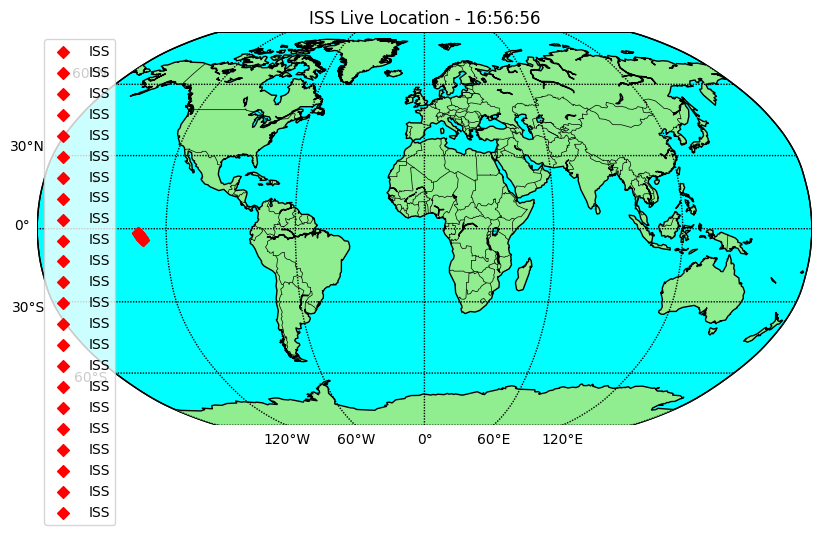

In [2]:
import requests
import time
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from IPython.display import clear_output

url = "http://api.open-notify.org/iss-now.json"

print("Tracking ISS live position:")

# Prepare map
plt.figure(figsize=(10, 6))
m = Basemap(projection='robin', resolution='c', lon_0=0)

# Set up plot
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen',lake_color='aqua')
m.drawparallels(range(-90, 91, 30), labels=[1,0,0,0])
m.drawmeridians(range(-180, 181, 60), labels=[0,0,0,1])

# Initialize position data
latitudes = []
longitudes = []

# Duration and Interval
duration = 60  # Run for 60 seconds
interval = 2   # Update every 2 seconds
start_time = time.time()

while (time.time() - start_time) < duration:
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        position = data['iss_position']
        timestamp = time.strftime('%H:%M:%S')
        lat = float(position['latitude'])
        lon = float(position['longitude'])

        # Store the positions for plotting
        latitudes.append(lat)
        longitudes.append(lon)

        # Clear output and update plot
        clear_output(wait=True)

        # Plot ISS position on the map
        x, y = m(lon, lat)
        m.scatter(x, y, color='red', marker='D', label="ISS", zorder=5)

        # Display the plot
        plt.title(f"ISS Live Location - {timestamp}")
        plt.legend(loc="upper left")
        plt.draw()

        print(f"🛰️ {timestamp} | ISS Location → Lat: {lat}, Lon: {lon}")
    else:
        print("Error:", response.status_code)

    time.sleep(interval)

plt.show()


viva questions
